In [1]:
import pandas as pd
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim


In [3]:
df = pd.read_pickle('gcse_specs.pkl')
df

,Author,Subject,Processed_Text
0,OCR,Mathematics,first assessment mathematicsregistere office e...
1,OCR,English Literature,first assessment first assessment office exemp...
2,OCR,English Language,first assessment office exempt charity update ...
3,OCR,History,first assessment history explain accredit firs...
4,OCR,History,partnership first assessment history first ass...
...,...,...,...
66,Pearson Edexcel,Urdu,draft qualification yet accredit publish enabl...
67,Pearson Edexcel,French,cation level first teach certiﬁ cation issue l...
68,Pearson Edexcel,German,cation level first teach certiﬁ cation issue l...
69,Pearson Edexcel,Spanish,cation level first teach certiﬁ cation issue l...


In [7]:
from gensim import corpora

# Step 1: Generate data_words
data_words = df['Processed_Text'].apply(lambda x: x.split()).tolist()

# Step 2: Create id2word dictionary
id2word = corpora.Dictionary(data_words)

# Step 3: Create the corpus
corpus = [id2word.doc2bow(text) for text in data_words]

# Step 4: Print the first 20 entries of the first document
print(corpus[0][0:20])

# Step 5: Print a specific word
word = id2word[0]
print(word)


[(0, 2), (1, 1), (2, 1), (3, 3), (4, 89), (5, 1), (6, 1), (7, 10), (8, 6), (9, 3), (10, 1), (11, 1), (12, 4), (13, 1), (14, 5), (15, 7), (16, 3), (17, 1), (18, 2), (19, 2)]
aa


In [9]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [11]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\Asha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.017384  0.232776       1        1  35.483654
14     0.154720  0.292282       2        1  19.978179
12     0.043918  0.332518       3        1   9.282701
5     -0.053910  0.288111       4        1   7.239419
24     0.162090  0.231437       5        1   6.838407
11     0.249572  0.227305       6        1   5.908442
10     0.052292  0.279920       7        1   5.385929
16    -0.287582  0.214437       8        1   4.838684
2     -0.122378  0.231670       9        1   2.415944
25     0.292328  0.079672      10        1   1.678972
18     0.205416  0.049918      11        1   0.875438
1     -0.100227 -0.116257      12        1   0.070861
3     -0.027358 -0.110243      13        1   0.000199
8     -0.029440 -0.118985      14        1   0.000197
28    -0.030654 -0.123686      15        1   0.000195
0     -0.032660 -0.129932      16        1   0.000192
27    -0.032388 -0.130508      17        1   0.000192
15    -0.031419 -0.125994      18        1   0.000189
4     -0.030935 -0.129711      19        1   0.000189
13    -0.031015 -0.125943      20        1   0.000189
20    -0.031923 -0.128667      21        1   0.000188
22    -0.033432 -0.136350      22        1   0.000185
29    -0.034729 -0.142332      23        1   0.000184
26    -0.032485 -0.130980      24        1   0.000184
23    -0.032071 -0.129927      25        1   0.000183
21    -0.032273 -0.131484      26        1   0.000182
6     -0.034459 -0.138923      27        1   0.000180
17    -0.033110 -0.133495      28        1   0.000180
19    -0.034645 -0.139896      29        1   0.000180
7     -0.033859 -0.136736      30        1   0.000180, topic_info=          Term          Freq         Total Category  logprob  loglift
1109       use  10238.000000  10238.000000  Default  30.0000  30.0000
1009   student   7618.000000   7618.000000  Default  29.0000  29.0000
594   language   4068.000000   4068.000000  Default  28.0000  28.0000
383      error   3094.000000   3094.000000  Default  27.0000  27.0000
610      level   5466.000000   5466.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
891   response      0.000483   2041.760512  Topic30  -7.8873  -2.0279
513       idea      0.000488   2253.603412  Topic30  -7.8781  -2.1175
1011   subject      0.000440   1660.619153  Topic30  -7.9804  -1.9144
774    present      0.000409   1494.939357  Topic30  -8.0527  -1.8816
832      range      0.000448   2084.696521  Topic30  -7.9635  -2.1250

[2433 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
4          1  0.312656  able
4          2  0.153002  able
4          3  0.069017  able
4          4  0.171295  able
4          5  0.070680  able
...      ...       ...   ...
16131      4  0.994751     ה
22277      1  0.993742     ક
22285      1  0.992899    કર
26470      1  0.995730  ﮐردن
33062      1  0.992168  ﮐرﻧﺎ

[3586 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 15, 13, 6, 25, 12, 11, 17, 3, 26, 19, 2, 4, 9, 29, 1, 28, 16, 5, 14, 21, 23, 30, 27, 24, 22, 7, 18, 20, 8])

In [25]:
#BIGRAMS AND TRIGRAMS
bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=75)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=75)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

print (data_bigrams_trigrams[0][0:20])

['first', 'assessment', 'mathematicsregistere', 'office_exempt_charity_update', 'time', 'effort', 'make', 'check', 'document_contradiction', 'publish', 'resource', 'specification', 'therefore', 'use', 'information', 'late', 'specification', 'time', 'change', 'make']


In [26]:
print(data_bigrams_trigrams[0])

['first', 'assessment', 'mathematicsregistere', 'office_exempt_charity_update', 'time', 'effort', 'make', 'check', 'document_contradiction', 'publish', 'resource', 'specification', 'therefore', 'use', 'information', 'late', 'specification', 'time', 'change', 'make', 'specification', 'indicate', 'document', 'new', 'version', 'number', 'indicate_summary', 'change', 'notice_discrepancy_specification', 'resource', 'contact', 'inform', 'centre', 'change', 'specification', 'also', 'publish', 'change', 'website_late', 'version', 'specification', 'always_website_differ', 'print_version_right_reserve', 'copyright_retain_copyright_publication', 'include', 'specification', 'however', 'register', 'centre', 'permit_copy', 'material', 'specification', 'booklet_internal', 'use', 'company_limit_register', 'register_company', 'number', 'teaching', 'learn', 'resource', 'choose', 'choose', 'qualification', 'choose', 'key', 'feature', 'specification', 'find', 'information', 'specification', 'overview', 'c

In [31]:
#TF-IDF REMOVAL
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

In [33]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [34]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\Asha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.052003  0.433120       1        1  10.856969
3      0.213630 -0.357318       2        1   9.794806
1     -0.366320  0.220448       3        1   8.584674
24    -0.149781  0.401925       4        1   8.004893
20    -0.043870 -0.416691       5        1   6.930393
7      0.393145 -0.010977       6        1   6.641133
5      0.379686  0.086330       7        1   6.157160
10    -0.304124 -0.183517       8        1   3.655616
21    -0.295198 -0.074931       9        1   3.071197
17     0.240199  0.190541      10        1   3.054684
16     0.258597 -0.102823      11        1   3.040618
6     -0.062409  0.213168      12        1   2.901680
13     0.103773 -0.269378      13        1   2.779319
0     -0.158112  0.172329      14        1   2.630955
8     -0.275388  0.050565      15        1   2.608960
29    -0.229998  0.087027      16        1   2.604253
4     -0.017316 -0.262278      17        1   2.571721
25    -0.141363 -0.218187      18        1   2.500616
19     0.092184  0.274772      19        1   2.451387
12     0.171528  0.121364      20        1   2.284289
9      0.120900 -0.166023      21        1   1.680004
22     0.158747 -0.035116      22        1   1.646998
18     0.059493  0.128706      23        1   1.644297
27     0.020374 -0.134408      24        1   0.959607
26    -0.051742 -0.103423      25        1   0.937136
14    -0.011915 -0.009875      26        1   0.001362
15    -0.012671 -0.011270      27        1   0.001325
23    -0.013349 -0.008476      28        1   0.001321
11    -0.012600 -0.007527      29        1   0.001321
28    -0.014095 -0.008077      30        1   0.001307, topic_info=             Term         Freq        Total Category  logprob  loglift
1115         tier  2348.000000  2348.000000  Default  30.0000  30.0000
390         error  1569.000000  1569.000000  Default  29.0000  29.0000
2028       medium   710.000000   710.000000  Default  28.0000  28.0000
1599       nature   606.000000   606.000000  Default  27.0000  27.0000
1458         text   554.000000   554.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1162            v     0.000128   410.773208  Topic30  -9.2372  -3.7332
508             h     0.000119   295.737788  Topic30  -9.3151  -3.4826
788    population     0.000106   135.600682  Topic30  -9.4320  -2.8197
1100  temperature     0.000108   195.992189  Topic30  -9.4115  -3.1676
860             r     0.000109   288.565656  Topic30  -9.4000  -3.5429

[1713 rows x 6 columns], token_table=       Topic      Freq                           Term
term                                                 
5          1  0.237154                   acceleration
5          3  0.553358                   acceleration
5         15  0.191982                   acceleration
2296      11  0.871845                     acceptable
1207      11  0.791718  accurate_spelling_punctuation
...      ...       ...                            ...
22230     17  0.888641                              ﺐ
22283     17  0.914714                              ﺮ
31223      7  0.909654                          ﻣدرﺳﮫ
37695      7  0.945199                            ﻣﯾں
22447     17  0.978224                              ﻲ

[1941 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 25, 21, 8, 6, 11, 22, 18, 17, 7, 14, 1, 9, 30, 5, 26, 20, 13, 10, 23, 19, 28, 27, 15, 16, 24, 12, 29])

In [37]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [39]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\Asha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.199633  0.349693       1        1  11.543941
19     0.207646 -0.374907       2        1   9.199236
3      0.367775  0.090148       3        1   9.075311
7     -0.251899 -0.289026       4        1   8.840398
1     -0.175890  0.297986       5        1   8.019023
13     0.181853  0.293597       6        1   7.152259
4      0.323540  0.026383       7        1   6.339080
6     -0.321507 -0.046532       8        1   5.849887
5      0.199653  0.188434       9        1   5.416027
16    -0.211178 -0.092102      10        1   5.147722
11    -0.136540 -0.205502      11        1   4.004116
12    -0.008841 -0.292972      12        1   3.782281
10    -0.250322  0.090400      13        1   3.746205
8     -0.081508  0.204344      14        1   3.482791
9      0.206924 -0.087913      15        1   2.483334
15     0.130938  0.033367      16        1   2.448041
0     -0.063699  0.052251      17        1   1.757513
18     0.063553 -0.158792      18        1   1.709933
17     0.008886 -0.038534      19        1   0.001459
14     0.010250 -0.040323      20        1   0.001443, topic_info=                Term         Freq        Total Category  logprob  loglift
1115            tier  2250.000000  2250.000000  Default  30.0000  30.0000
390            error  1501.000000  1501.000000  Default  29.0000  29.0000
2028          medium   696.000000   696.000000  Default  28.0000  28.0000
1458            text   578.000000   578.000000  Default  27.0000  27.0000
1599          nature   584.000000   584.000000  Default  26.0000  26.0000
...              ...          ...          ...      ...      ...      ...
1654           speak     0.000175   750.404615  Topic20  -9.0292  -4.1278
916   representation     0.000119   136.109807  Topic20  -9.4141  -2.8055
202        component     0.000154   597.909193  Topic20  -9.1569  -4.0283
536       importance     0.000142   379.348932  Topic20  -9.2349  -3.6514
1458            text     0.000140   578.403451  Topic20  -9.2501  -4.0884

[1155 rows x 6 columns], token_table=       Topic      Freq                           Term
term                                                 
5          1  0.264818                   acceleration
5          5  0.529635                   acceleration
5         14  0.204632                   acceleration
1207      10  0.921386  accurate_spelling_punctuation
3983       1  0.713281                           acid
...      ...       ...                            ...
30966     16  0.850978                            ﺷدن
31223      3  0.113142                          ﻣدرﺳﮫ
31223     16  0.905133                          ﻣدرﺳﮫ
31258     16  0.903994                         ﻣوﺳﯾﻘﯽ
37695      9  0.971214                            ﻣﯾں

[1491 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 20, 4, 8, 2, 14, 5, 7, 6, 17, 12, 13, 11, 9, 10, 16, 1, 19, 18, 15])

In [41]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=5,          # Start with 5 topics; try increasing to 10
                                            random_state=100,      
                                            update_every=1,        
                                            chunksize=10,          # Small chunksize for frequent updates
                                            passes=20,             # Increase passes for better learning
                                            alpha="auto")          


In [42]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\Asha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.219915 -0.252029       1        1  33.501987
2     -0.045832  0.203674       2        1  22.279033
4     -0.142561 -0.191569       3        1  19.554768
3     -0.272109  0.055824       4        1  14.656570
1      0.240586  0.184100       5        1  10.007643, topic_info=               Term         Freq        Total Category  logprob  loglift
1115           tier  2524.000000  2524.000000  Default  30.0000  30.0000
390           error  1817.000000  1817.000000  Default  29.0000  29.0000
1599         nature   560.000000   560.000000  Default  28.0000  28.0000
2028         medium   574.000000   574.000000  Default  27.0000  27.0000
1654          speak   845.000000   845.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
788      population   112.346340   151.462615   Topic5  -4.4986   2.0031
1984    investigate   161.020787   361.997966   Topic5  -4.1386   1.4917
2715         energy   127.116249   427.420539   Topic5  -4.3751   1.0892
1985  investigation    68.309799   109.166698   Topic5  -4.9961   1.8330
496           graph    68.605009   178.390658   Topic5  -4.9918   1.3462

[215 rows x 6 columns], token_table=       Topic      Freq                         Term
term                                               
4957       2  0.999171  assessable_learning_outcome
5437       2  0.993316                         atom
88         4  0.997426                     attitude
1227       3  0.998528                     audience
1732       4  0.989849                    authority
...      ...       ...                          ...
2289       4  0.995834                      worship
1482       1  0.411269                      writing
1482       3  0.579995                      writing
25440      1  0.995588                           το
30309      1  0.996602                         ﮐردن

[213 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 4, 2])

In [45]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10,          # Start with 5 topics; try increasing to 10
                                            random_state=100,      
                                            update_every=1,        
                                            chunksize=10,          # Small chunksize for frequent updates
                                            passes=20,             # Increase passes for better learning
                                            alpha="auto")          


In [46]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\Asha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.365777  0.053799       1        1  27.290199
5      0.141663  0.372849       2        1  23.653273
1     -0.300494 -0.143325       3        1  21.006206
6     -0.241386  0.240239       4        1  15.879146
4      0.101426 -0.406029       5        1   9.079064
0     -0.071510  0.026451       6        1   3.091460
8      0.001129 -0.036000       7        1   0.000164
2      0.001014 -0.036080       8        1   0.000163
3      0.001177 -0.035962       9        1   0.000163
9      0.001204 -0.035942      10        1   0.000163, topic_info=                      Term         Freq        Total Category  logprob  \
1115                  tier  2689.000000  2689.000000  Default  30.0000   
390                  error  1844.000000  1844.000000  Default  29.0000   
1654                 speak  1241.000000  1241.000000  Default  28.0000   
1599                nature   713.000000   713.000000  Default  27.0000   
796              practical   644.000000   644.000000  Default  26.0000   
...                    ...          ...          ...      ...      ...   
31               advantage     0.000004     0.511086  Topic10 -10.5954   
34                  affect     0.000004     0.511086  Topic10 -10.5954   
5             acceleration     0.000004    86.127354  Topic10 -10.5954   
28    addition_subtraction     0.000004     1.884574  Topic10 -10.5954   
29       additionally_able     0.000004    12.231781  Topic10 -10.5954   

      loglift  
1115  30.0000  
390   29.0000  
1654  28.0000  
1599  27.0000  
796   26.0000  
...       ...  
31     1.5978  
34     1.5978  
5     -3.5293  
28     0.2929  
29    -1.5775  

[376 rows x 6 columns], token_table=       Topic      Freq                  Term
term                                        
5          3  0.998521          acceleration
3072       6  0.907174         accompaniment
28         2  0.530624  addition_subtraction
20835      2  0.992982   additional_guidance
29         2  0.981051     additionally_able
...      ...       ...                   ...
1482       1  0.994312               writing
24902      2  0.990937                     ο
25440      2  0.997084                    το
30309      2  0.997870                  ﮐردن
36977      2  0.998374                  ﮐرﻧﺎ

[245 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 2, 7, 5, 1, 9, 3, 4, 10])

In [49]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=20,          # Start with 5 topics; try increasing to 10
                                            random_state=100,      
                                            update_every=1,        
                                            chunksize=10,          # Small chunksize for frequent updates
                                            passes=20,             # Increase passes for better learning
                                            alpha="auto")          


In [50]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\Asha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.313769  0.241456       1        1  27.994967
1      0.051000 -0.186784       2        1  19.312593
5     -0.323753 -0.231903       3        1  18.155026
12    -0.106755  0.253560       4        1  12.311277
10     0.346823 -0.273691       5        1   7.335189
13     0.168088 -0.039221       6        1   4.157691
16     0.047561  0.156695       7        1   4.121461
6     -0.088045 -0.105056       8        1   3.962782
4     -0.153855  0.051773       9        1   2.614280
17    -0.022878  0.012407      10        1   0.025586
0     -0.023188  0.012074      11        1   0.000923
8     -0.023197  0.012078      12        1   0.000922
14    -0.023199  0.012078      13        1   0.000920
9     -0.023199  0.012080      14        1   0.000920
3     -0.023194  0.012074      15        1   0.000915
11    -0.023199  0.012079      16        1   0.000914
19    -0.023195  0.012075      17        1   0.000912
18    -0.023199  0.012078      18        1   0.000909
2     -0.023194  0.012075      19        1   0.000908
15    -0.023189  0.012074      20        1   0.000904, topic_info=                      Term         Freq        Total Category  logprob  \
1115                  tier  6646.000000  6646.000000  Default  30.0000   
390                  error  4725.000000  4725.000000  Default  29.0000   
1599                nature  1927.000000  1927.000000  Default  28.0000   
1654                 speak  3047.000000  3047.000000  Default  27.0000   
2028                medium   764.000000   764.000000  Default  26.0000   
...                    ...          ...          ...      ...      ...   
31               advantage     0.000023     0.856542  Topic20 -10.5954   
34                  affect     0.000023     0.856542  Topic20 -10.5954   
5             acceleration     0.000023     0.857280  Topic20 -10.5954   
28    addition_subtraction     0.000023     0.856546  Topic20 -10.5954   
29       additionally_able     0.000023    30.899167  Topic20 -10.5954   

      loglift  
1115  30.0000  
390   29.0000  
1599  28.0000  
1654  27.0000  
2028  26.0000  
...       ...  
31     1.0814  
34     1.0814  
5      1.0806  
28     1.0814  
29    -2.5042  

[714 rows x 6 columns], token_table=      Topic      Freq                           Term
term                                                
3072      6  0.977893                  accompaniment
1207      7  0.885867  accurate_spelling_punctuation
29        3  0.970900              additionally_able
3771      1  0.999214                      adjective
1214      7  0.835782                 analyse_writer
...     ...       ...                            ...
2272      4  0.989325                        warfare
2283      1  0.574761                          woman
2283      4  0.415105                          woman
1481      7  0.949544                         writer
1482      7  0.991415                        writing

[327 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 2, 6, 13, 11, 14, 17, 7, 5, 18, 1, 9, 15, 10, 4, 12, 20, 19, 3, 16])

In [141]:
 lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=5,          # Start with 5 topics; try increasing to 10
                                            random_state=100,      
                                            update_every=1,        
                                            chunksize=10,          # Small chunksize for frequent updates
                                            passes=50,             # Increase passes for better learning
                                            alpha="auto")          

In [149]:
pip install --upgrade pyLDAvis

In [155]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\Asha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.218054 -0.250432       1        1  33.440878
2     -0.042686  0.233259       2        1  22.260517
4     -0.140348 -0.199284       3        1  19.540885
3     -0.271924  0.050567       4        1  14.901984
1      0.236904  0.165890       5        1   9.855736, topic_info=               Term         Freq        Total Category  logprob  loglift
1115           tier  2423.000000  2423.000000  Default  30.0000  30.0000
390           error  1718.000000  1718.000000  Default  29.0000  29.0000
1599         nature   532.000000   532.000000  Default  28.0000  28.0000
2028         medium   598.000000   598.000000  Default  27.0000  27.0000
1654          speak   828.000000   828.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
788      population   104.720639   148.683014   Topic5  -4.5536   1.9666
1984    investigate   146.116300   341.122765   Topic5  -4.2205   1.4693
2715         energy   115.875686   438.182294   Topic5  -4.4524   0.9870
496           graph    67.383828   185.023699   Topic5  -4.9945   1.3070
1985  investigation    62.202511   109.136352   Topic5  -5.0745   1.7549

[217 rows x 6 columns], token_table=       Topic      Freq                         Term
term                                               
4957       2  0.999522  assessable_learning_outcome
5437       2  0.994593                         atom
88         4  0.999440                     attitude
1227       3  0.999744                     audience
1732       4  0.989961                    authority
...      ...       ...                          ...
2289       4  0.993189                      worship
1482       1  0.381153                      writing
1482       3  0.621882                      writing
25440      1  0.995399                           το
30309      1  0.997261                         ﮐردن

[216 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 4, 2])

In [57]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10,          # Start with 5 topics; try increasing to 10
                                            random_state=100,      
                                            update_every=1,        
                                            chunksize=10,          # Small chunksize for frequent updates
                                            passes=50,             # Increase passes for better learning
                                            alpha="auto")   

In [58]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\Asha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.373089  0.057781       1        1  27.274203
5      0.136099  0.367352       2        1  23.654580
1     -0.322465 -0.146901       3        1  20.999124
6     -0.239349  0.245138       4        1  15.895781
4      0.094300 -0.395909       5        1   9.076992
0     -0.071104  0.025266       6        1   3.098986
8      0.007356 -0.038185       7        1   0.000084
2      0.007238 -0.038267       8        1   0.000084
3      0.007404 -0.038148       9        1   0.000083
9      0.007432 -0.038128      10        1   0.000083, topic_info=                      Term         Freq        Total Category  logprob  \
1115                  tier  2615.000000  2615.000000  Default  30.0000   
390                  error  1772.000000  1772.000000  Default  29.0000   
1654                 speak  1097.000000  1097.000000  Default  28.0000   
1599                nature   666.000000   666.000000  Default  27.0000   
796              practical   678.000000   678.000000  Default  26.0000   
...                    ...          ...          ...      ...      ...   
31               advantage     0.000002     0.486643  Topic10 -10.5954   
34                  affect     0.000002     0.486643  Topic10 -10.5954   
5             acceleration     0.000002    87.567178  Topic10 -10.5954   
28    addition_subtraction     0.000002     1.975662  Topic10 -10.5954   
29       additionally_able     0.000002    17.383958  Topic10 -10.5954   

      loglift  
1115  30.0000  
390   29.0000  
1654  28.0000  
1599  27.0000  
796   26.0000  
...       ...  
31     1.6468  
34     1.6468  
5     -3.5458  
28     0.2457  
29    -1.9290  

[378 rows x 6 columns], token_table=       Topic      Freq                  Term
term                                        
5          3  0.993523          acceleration
3072       6  0.908566         accompaniment
28         2  1.012319  addition_subtraction
20835      2  0.997763   additional_guidance
29         2  0.977913     additionally_able
...      ...       ...                   ...
1482       1  1.000562               writing
24902      2  0.995480                     ο
25440      2  0.999665                    το
30309      2  0.998479                  ﮐردن
36977      2  0.995739                  ﮐرﻧﺎ

[249 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 2, 7, 5, 1, 9, 3, 4, 10])

In [63]:
df_nat = df[df['Processed_Text'].str.contains('nature')].reset_index(drop=True)
df_nat

,Author,Subject,Processed_Text
0,OCR,English Language,first assessment office exempt charity update ...
1,OCR,History,first assessment history explain accredit firs...
2,OCR,History,partnership first assessment history first ass...
3,OCR,Geography A,first assessment office exempt charity update ...
4,OCR,Geography A,geography first assessment office exempt chari...
5,OCR,Music,first assessment office exempt charity update ...
6,OCR,Biology,first assessment first assessment office exemp...
7,OCR,Biology,first assessment office exempt charity update ...
8,OCR,Combined Science,first assessment office exempt charity update ...
9,OCR,Combined Science,first assessment office exempt charity update ...


In [65]:
lda_model7 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=7,          # Start with 5 topics; try increasing to 10
                                            random_state=100,      
                                            update_every=1,        
                                            chunksize=10,          # Small chunksize for frequent updates
                                            passes=50,             # Increase passes for better learning
                                            alpha="auto")   

In [67]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model7, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\Asha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.120639 -0.357131       1        1  31.410022
2      0.124182  0.299826       2        1  22.906468
6     -0.216817 -0.185879       3        1  17.321991
3     -0.249022  0.195100       4        1  10.947162
0      0.021173  0.047286       5        1   9.659177
1      0.329974 -0.003930       6        1   3.906289
4     -0.130130  0.004728       7        1   3.848891, topic_info=                Term         Freq        Total Category  logprob  loglift
1115            tier  2590.000000  2590.000000  Default  30.0000  30.0000
390            error  1792.000000  1792.000000  Default  29.0000  29.0000
2028          medium   657.000000   657.000000  Default  28.0000  28.0000
1599          nature   518.000000   518.000000  Default  27.0000  27.0000
350                e   654.000000   654.000000  Default  26.0000  26.0000
...              ...          ...          ...      ...      ...      ...
2894  sustainability    10.601331    19.611098   Topic7  -5.9036   2.6423
134      calculation    21.557507   163.805898   Topic7  -5.1939   1.2294
3372         observe     9.355333    21.084679   Topic7  -6.0287   2.4448
2809          market     9.969448    34.046668   Topic7  -5.9651   2.0292
2964         ethical     8.549977    25.309793   Topic7  -6.1187   2.1721

[301 rows x 6 columns], token_table=       Topic      Freq                    Term
term                                          
1208       4  0.979649                  action
3923       5  0.960833                   actor
3079       7  0.966128                adequate
32         7  0.939519  advantage_disadvantage
4008       7  0.869414     analysis_evaluation
...      ...       ...                     ...
2289       4  0.994610                 worship
1482       3  0.990842                 writing
25440      1  0.997368                      το
30309      1  0.996697                    ﮐردن
36977      1  0.997246                    ﮐرﻧﺎ

[325 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 7, 4, 1, 2, 5])

In [69]:
lda_model8 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=8,          # Start with 5 topics; try increasing to 10
                                            random_state=100,      
                                            update_every=1,        
                                            chunksize=10,          # Small chunksize for frequent updates
                                            passes=50,             # Increase passes for better learning
                                            alpha="auto")   

In [70]:
pyLDAvis.enable_notebook()
vis8 = pyLDAvis.gensim.prepare(lda_model8, corpus, id2word, mds="mmds", R=30)
vis8

C:\Users\Asha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.129237  0.379049       1        1  29.379633
2     -0.000518 -0.337774       2        1  22.774860
7     -0.310869 -0.108595       3        1  21.604214
6     -0.226384  0.195744       4        1  13.397297
4      0.350218 -0.118790       5        1   6.716545
0      0.048479 -0.051103       6        1   3.067245
3      0.045674  0.052493       7        1   2.113807
1     -0.035837 -0.011023       8        1   0.946398, topic_info=                Term         Freq        Total Category  logprob  loglift
1115            tier  2603.000000  2603.000000  Default  30.0000  30.0000
390            error  1810.000000  1810.000000  Default  29.0000  29.0000
1599          nature   595.000000   595.000000  Default  28.0000  28.0000
2028          medium   697.000000   697.000000  Default  27.0000  27.0000
350                e   571.000000   571.000000  Default  26.0000  26.0000
...              ...          ...          ...      ...      ...      ...
114             bias     0.020101    14.847255   Topic8 -10.7687  -1.9445
3560         texture     0.020100    16.274912   Topic8 -10.7688  -2.0364
788       population     0.020099   100.187930   Topic8 -10.7688  -3.8539
6178        category     0.020099    11.939026   Topic8 -10.7688  -1.7266
8586  minimise_waste     0.020096     8.730113   Topic8 -10.7690  -1.4137

[327 rows x 6 columns], token_table=       Topic      Freq                         Term
term                                               
3072       6  0.901421                accompaniment
3771       3  0.998611                    adjective
4957       2  0.998413  assessable_learning_outcome
5437       2  0.997379                         atom
88         4  0.998108                     attitude
...      ...       ...                          ...
1482       3  0.993373                      writing
6801       8  0.568467                     þexplain
25440      1  0.997291                           το
30309      1  0.997211                         ﮐردن
36977      1  0.994764                         ﮐرﻧﺎ

[317 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 8, 7, 5, 1, 4, 2])

In [73]:
lda_model6 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=6,          # Start with 5 topics; try increasing to 10
                                            random_state=100,      
                                            update_every=1,        
                                            chunksize=10,          # Small chunksize for frequent updates
                                            passes=50,             # Increase passes for better learning
                                            alpha="auto")   

In [75]:
pyLDAvis.enable_notebook()
vis6 = pyLDAvis.gensim.prepare(lda_model6, corpus, id2word, mds="mmds", R=30)
vis6

C:\Users\Asha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.118512 -0.332168       1        1  29.765038
2     -0.103196  0.259353       2        1  22.588328
0      0.213120 -0.172727       3        1  15.523962
3      0.238549  0.203840       4        1  15.088230
1      0.073762  0.014212       5        1   8.801064
4     -0.303721  0.027489       6        1   8.233379, topic_info=               Term         Freq        Total Category  logprob  loglift
1115           tier  2456.000000  2456.000000  Default  30.0000  30.0000
390           error  1712.000000  1712.000000  Default  29.0000  29.0000
1599         nature   556.000000   556.000000  Default  28.0000  28.0000
2028         medium   524.000000   524.000000  Default  27.0000  27.0000
1458           text   482.000000   482.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
1935         growth    74.149735    96.476635   Topic6  -4.7189   2.2338
788      population    95.016895   143.432845   Topic6  -4.4710   2.0852
1985  investigation    66.211470    86.423755   Topic6  -4.8322   2.2306
1984    investigate   133.205407   340.872178   Topic6  -4.1331   1.5574
2715         energy   105.604373   448.944948   Topic6  -4.3653   1.0498

[250 rows x 6 columns], token_table=       Topic      Freq                         Term
term                                               
3771       1  0.997458                    adjective
54         5  0.982828                        angle
4957       2  0.992799  assessable_learning_outcome
5437       2  0.994999                         atom
88         4  0.997665                     attitude
...      ...       ...                          ...
1482       3  0.997533                      writing
9402       3  0.126818                            ü
9402       5  0.845453                            ü
25440      1  0.998907                           το
30309      1  0.995535                         ﮐردن

[252 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 1, 4, 2, 5])

In [77]:
 lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=5,          # Start with 5 topics; try increasing to 10
                                            random_state=100,      
                                            update_every=1,        
                                            chunksize=10,          # Small chunksize for frequent updates
                                            passes=50,             # Increase passes for better learning
                                            alpha="auto")  

In [78]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\Asha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.218054 -0.250432       1        1  33.440877
2     -0.042686  0.233259       2        1  22.260517
4     -0.140348 -0.199284       3        1  19.540885
3     -0.271924  0.050567       4        1  14.901984
1      0.236904  0.165890       5        1   9.855737, topic_info=               Term         Freq        Total Category  logprob  loglift
1115           tier  2423.000000  2423.000000  Default  30.0000  30.0000
390           error  1718.000000  1718.000000  Default  29.0000  29.0000
1599         nature   532.000000   532.000000  Default  28.0000  28.0000
2028         medium   598.000000   598.000000  Default  27.0000  27.0000
1654          speak   828.000000   828.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
788      population   104.720643   148.683019   Topic5  -4.5536   1.9666
1984    investigate   146.116305   341.122771   Topic5  -4.2205   1.4693
2715         energy   115.875690   438.182300   Topic5  -4.4524   0.9870
496           graph    67.383830   185.023702   Topic5  -4.9945   1.3070
1985  investigation    62.202514   109.136356   Topic5  -5.0745   1.7549

[217 rows x 6 columns], token_table=       Topic      Freq                         Term
term                                               
4957       2  0.999522  assessable_learning_outcome
5437       2  0.994593                         atom
88         4  0.999440                     attitude
1227       3  0.999744                     audience
1732       4  0.989961                    authority
...      ...       ...                          ...
2289       4  0.993189                      worship
1482       1  0.381153                      writing
1482       3  0.621882                      writing
25440      1  0.995399                           το
30309      1  0.997261                         ﮐردن

[216 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 4, 2])

In [81]:
from gensim.models import CoherenceModel

# Assuming lda_model is your trained LDA model, and texts is your list of tokenized documents
coherence_model_umass = CoherenceModel(model=lda_model6, corpus=corpus, coherence='u_mass')
coherence_umass = coherence_model_umass.get_coherence()

coherence_model_cv = CoherenceModel(model=lda_model6, texts=texts, dictionary=id2word, coherence='c_v')
coherence_cv = coherence_model_cv.get_coherence()

print(f'Coherence UMass: {coherence_umass}')
print(f'Coherence C_v: {coherence_cv}')


Coherence UMass: -6.738902392357736
Coherence C_v: 0.5686790804355054


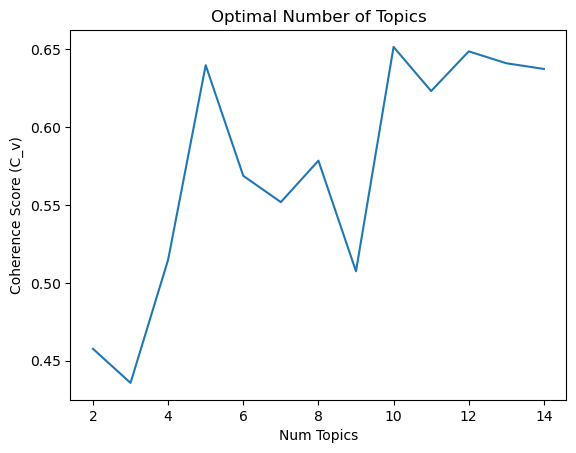

In [89]:
coherence_values = []
model_list = []
for num_topics in range(2, 15, 1):
    model = gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=50, random_state=100, update_every=1,        
                                            chunksize=10, alpha="auto")
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

# Plot coherence scores
import matplotlib.pyplot as plt

plt.plot(range(2, 15, 1), coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score (C_v)")
plt.title("Optimal Number of Topics")
plt.show()


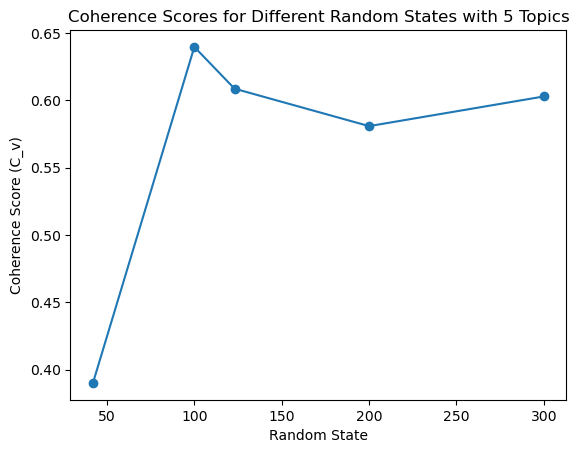

In [90]:
import numpy as np

# List of different random states to try
random_states = [42, 100, 123, 200, 300]

# Set num_topics as an example
num_topics = 5

coherence_values = []
model_list = []
for random_state in random_states:
    model = gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=50, random_state=random_state, update_every=1,        
                                            chunksize=10, alpha="auto")
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

# Plot coherence scores
plt.plot(random_states, coherence_values, marker='o')
plt.xlabel("Random State")
plt.ylabel("Coherence Score (C_v)")
plt.title(f"Coherence Scores for Different Random States with {num_topics} Topics")
plt.show()


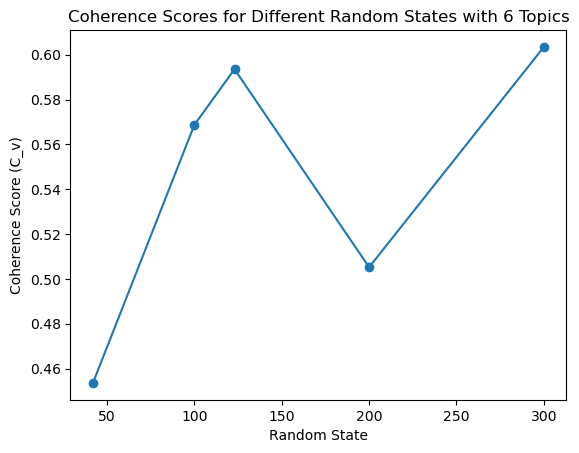

In [126]:
import numpy as np

# List of different random states to try
random_states = [42, 100, 123, 200, 300]

# Set num_topics as an example
num_topics = 6

coherence_values = []
model_list = []
for random_state in random_states:
    model = gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=50, random_state=random_state, update_every=1,        
                                            chunksize=10, alpha="auto")
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

# Plot coherence scores
plt.plot(random_states, coherence_values, marker='o')
plt.xlabel("Random State")
plt.ylabel("Coherence Score (C_v)")
plt.title(f"Coherence Scores for Different Random States with {num_topics} Topics")
plt.show()


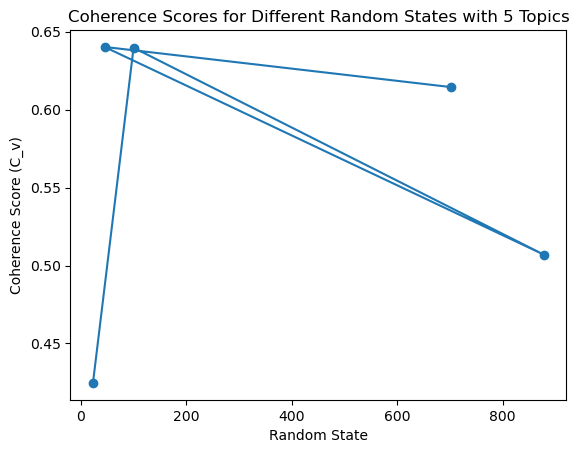

In [123]:
# List of different random states to try
random_states = [23, 100, 878, 45, 701]

# Set num_topics as an example
num_topics = 5

coherence_values = []
model_list = []
for random_state in random_states:
    model = gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=50, random_state=random_state, update_every=1,        
                                            chunksize=10, alpha="auto")
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

# Plot coherence scores
plt.plot(random_states, coherence_values, marker='o')
plt.xlabel("Random State")
plt.ylabel("Coherence Score (C_v)")
plt.title(f"Coherence Scores for Different Random States with {num_topics} Topics")
plt.show()


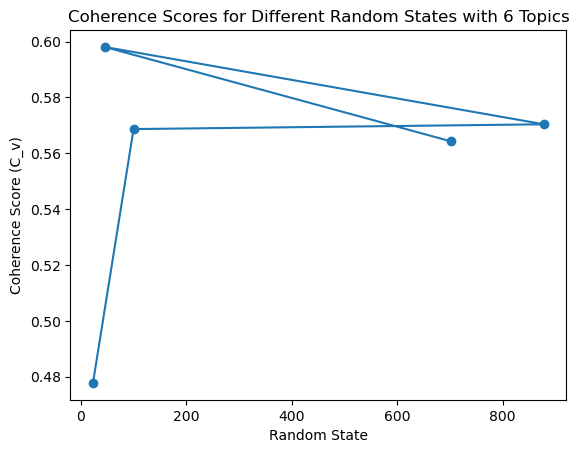

In [125]:
# List of different random states to try
random_states = [23, 100, 878, 45, 701]

# Set num_topics as an example
num_topics = 6

coherence_values = []
model_list = []
for random_state in random_states:
    model = gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=50, random_state=random_state, update_every=1,        
                                            chunksize=10, alpha="auto")
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

# Plot coherence scores
plt.plot(random_states, coherence_values, marker='o')
plt.xlabel("Random State")
plt.ylabel("Coherence Score (C_v)")
plt.title(f"Coherence Scores for Different Random States with {num_topics} Topics")
plt.show()


In [107]:

lda_model_sparse = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=50,
                                           alpha=0.1)

In [108]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_sparse, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\Asha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.217574 -0.250476       1        1  33.416723
2     -0.043002  0.233409       2        1  22.263479
4     -0.140218 -0.199282       3        1  19.570590
3     -0.271482  0.050391       4        1  14.740175
1      0.237128  0.165957       5        1  10.009033, topic_info=               Term         Freq        Total Category  logprob  loglift
1115           tier  2423.000000  2423.000000  Default  30.0000  30.0000
390           error  1718.000000  1718.000000  Default  29.0000  29.0000
1599         nature   529.000000   529.000000  Default  28.0000  28.0000
2028         medium   599.000000   599.000000  Default  27.0000  27.0000
1654          speak   828.000000   828.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
788      population   105.971657   149.943577   Topic5  -4.5572   1.9546
1984    investigate   147.862659   342.893715   Topic5  -4.2240   1.4605
2715         energy   117.252820   439.619288   Topic5  -4.4560   0.9801
496           graph    68.178094   185.865520   Topic5  -4.9982   1.2988
1985  investigation    62.945291   109.901282   Topic5  -5.0781   1.7444

[217 rows x 6 columns], token_table=       Topic      Freq                         Term
term                                               
4957       2  0.999422  assessable_learning_outcome
5437       2  0.994493                         atom
88         4  0.997041                     attitude
1227       3  0.999133                     audience
1732       4  0.995207                    authority
...      ...       ...                          ...
2289       4  0.998466                      worship
1482       1  0.381020                      writing
1482       3  0.621664                      writing
25440      1  0.995758                           το
30309      1  0.997621                         ﮐردن

[216 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 4, 2])

In [113]:
lda_model_symmetric = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=50,
                                           alpha=1)

In [116]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_symmetric, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\Asha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.220982 -0.249600       1        1  33.302498
2     -0.042855  0.232896       2        1  22.566114
4     -0.142795 -0.200111       3        1  19.372801
3     -0.271408  0.050823       4        1  14.929157
1      0.236076  0.165992       5        1   9.829429, topic_info=               Term         Freq        Total Category  logprob  loglift
1115           tier  2411.000000  2411.000000  Default  30.0000  30.0000
390           error  1709.000000  1709.000000  Default  29.0000  29.0000
1599         nature   533.000000   533.000000  Default  28.0000  28.0000
2028         medium   598.000000   598.000000  Default  27.0000  27.0000
1654          speak   824.000000   824.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
788      population   104.542817   148.745287   Topic5  -4.5526   1.9672
1984    investigate   145.800446   342.219479   Topic5  -4.2200   1.4666
2715         energy   115.551867   440.291339   Topic5  -4.4525   0.9821
496           graph    67.187744   185.813362   Topic5  -4.9947   1.3025
1985  investigation    62.024868   109.256518   Topic5  -5.0747   1.7536

[213 rows x 6 columns], token_table=       Topic      Freq                         Term
term                                               
4957       2  0.993130  assessable_learning_outcome
5437       2  0.994070                         atom
88         4  0.997886                     attitude
1227       3  0.999592                     audience
1732       4  0.988427                    authority
...      ...       ...                          ...
2625       2  0.996831                        water
3062       2  0.997788                         wave
2289       4  0.991648                      worship
25440      1  0.995854                           το
30309      1  0.997430                         ﮐردن

[208 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 4, 2])

In [119]:
lda_model_dense = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=50,
                                           alpha=2)

In [121]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_dense, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\Asha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.220064 -0.250107       1        1  33.760481
2     -0.043589  0.232907       2        1  22.589442
4     -0.141935 -0.198602       3        1  18.822380
3     -0.271062  0.049733       4        1  14.746298
1      0.236522  0.166069       5        1  10.081399, topic_info=               Term         Freq        Total Category  logprob  loglift
1115           tier  2416.000000  2416.000000  Default  30.0000  30.0000
390           error  1711.000000  1711.000000  Default  29.0000  29.0000
1599         nature   530.000000   530.000000  Default  28.0000  28.0000
2028         medium   596.000000   596.000000  Default  27.0000  27.0000
1654          speak   825.000000   825.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
788      population   106.620042   150.791913   Topic5  -4.5583   1.9478
1984    investigate   148.577658   345.436309   Topic5  -4.2264   1.4508
2715         energy   117.620827   443.256936   Topic5  -4.4601   0.9678
496           graph    68.451717   187.351500   Topic5  -5.0014   1.2876
1985  investigation    63.184382   110.492557   Topic5  -5.0815   1.7356

[214 rows x 6 columns], token_table=       Topic      Freq                         Term
term                                               
4957       2  0.992284  assessable_learning_outcome
5437       2  0.999065                         atom
88         4  0.995791                     attitude
1227       3  0.999689                     audience
1732       4  0.993960                    authority
...      ...       ...                          ...
2289       4  0.997215                      worship
1482       1  0.455859                      writing
1482       3  0.547030                      writing
25440      1  0.999413                           το
30309      1  0.996040                         ﮐردن

[210 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 4, 2])

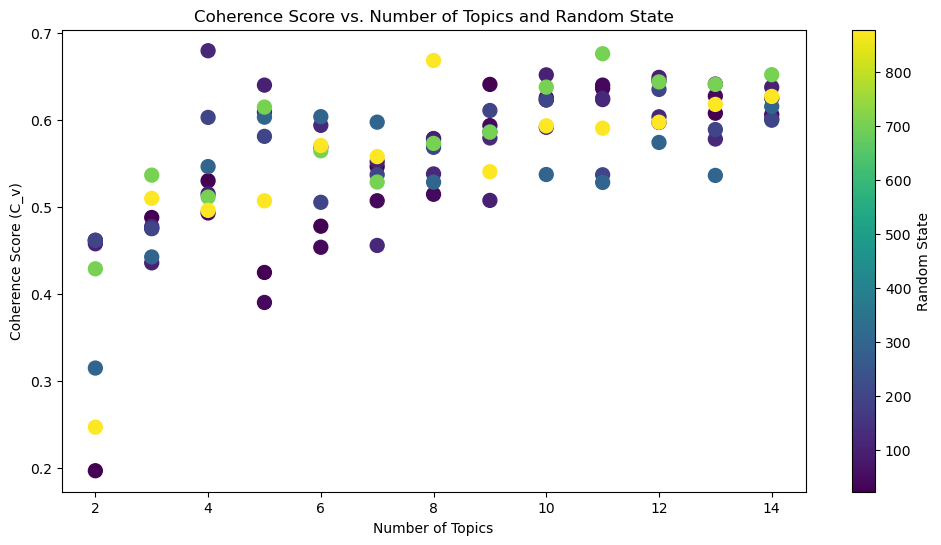

In [131]:


# Define ranges for parameters
random_states = [23, 42, 100, 123, 200, 300, 701, 878]

# Initialize lists to store results
coherence_values = []
params = []

for num_topics in range(2, 15, 1):
    for random_state in random_states:
        model = gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=50, random_state=random_state, update_every=1,        
                                            chunksize=10, alpha="auto")
        coherence_model = CoherenceModel(
            model=model,
            texts=texts,
            dictionary=id2word,
            coherence='c_v'
        )
        coherence_score = coherence_model.get_coherence()
        coherence_values.append(coherence_score)
        params.append((num_topics, random_state))

# Convert to numpy arrays for easier plotting
coherence_values = np.array(coherence_values)
params = np.array(params)

# Plot coherence scores
plt.figure(figsize=(12, 6))
scatter = plt.scatter(params[:, 0], coherence_values, c=params[:, 1], cmap='viridis', s=100)
plt.colorbar(scatter, label='Random State')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (C_v)')
plt.title('Coherence Score vs. Number of Topics and Random State')
plt.show()


In [133]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=50,
                                           alpha="auto")

In [135]:
# Assuming lda_model is your trained LDA model, and texts is your list of tokenized documents
coherence_model_umass = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
coherence_umass = coherence_model_umass.get_coherence()

coherence_model_cv = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_cv = coherence_model_cv.get_coherence()

print(f'Coherence UMass: {coherence_umass}')
print(f'Coherence C_v: {coherence_cv}')

Coherence UMass: -7.9894948144077595
Coherence C_v: 0.514788332677713


In [139]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\Asha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.279135  0.106081       1        1  32.978967
0      0.088736  0.226073       2        1  24.822111
2      0.237478 -0.052985       3        1  22.382330
1     -0.047079 -0.279169       4        1  19.816592, topic_info=             Term         Freq        Total Category  logprob  loglift
1115         tier  2359.000000  2359.000000  Default  30.0000  30.0000
390         error  1634.000000  1634.000000  Default  29.0000  29.0000
1654        speak   788.000000   788.000000  Default  28.0000  28.0000
796     practical   515.000000   515.000000  Default  27.0000  27.0000
1458         text   493.000000   493.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1954        human   282.315061   370.640075   Topic4  -4.2603   1.3464
350             e   266.062252   383.467144   Topic4  -4.3196   1.2531
788    population   155.675397   196.360900   Topic4  -4.8556   1.3865
1984  investigate   217.306320   396.801676   Topic4  -4.5220   1.0165
2715       energy   172.021205   469.162435   Topic4  -4.7557   0.6153

[177 rows x 6 columns], token_table=       Topic      Freq                         Term
term                                               
4957       3  0.997106  assessable_learning_outcome
5437       3  0.997823                         atom
88         4  0.994018                     attitude
1227       2  0.997423                     audience
100        2  0.994814                            b
...      ...       ...                          ...
1476       2  0.043785                   vocabulary
2625       3  0.995068                        water
3062       3  0.996735                         wave
25440      1  0.999502                           το
30309      1  0.998667                         ﮐردن

[167 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

In [165]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=11,
                                           random_state=701,
                                           update_every=1,
                                           chunksize=10,
                                           passes=50,
                                           alpha="auto")

In [166]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\Asha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.155169  0.409447       1        1  39.303588
8     -0.209716 -0.326906       2        1  17.928324
4     -0.259038  0.220041       3        1  17.236204
5      0.224203  0.141709       4        1  11.874634
9      0.358610 -0.214531       5        1  10.510927
3     -0.150704 -0.019673       6        1   3.145847
6     -0.023705 -0.042017       7        1   0.000095
0     -0.023705 -0.042017       8        1   0.000095
7     -0.023705 -0.042017       9        1   0.000095
1     -0.023705 -0.042017      10        1   0.000095
2     -0.023705 -0.042017      11        1   0.000095, topic_info=                      Term         Freq        Total Category  logprob  \
1115                  tier  2972.000000  2972.000000  Default  30.0000   
390                  error  2081.000000  2081.000000  Default  29.0000   
1599                nature   721.000000   721.000000  Default  28.0000   
350                      e   676.000000   676.000000  Default  27.0000   
796              practical   650.000000   650.000000  Default  26.0000   
...                    ...          ...          ...      ...      ...   
31               advantage     0.000002     0.448967  Topic11 -10.5954   
34                  affect     0.000002     0.448967  Topic11 -10.5954   
5             acceleration     0.000002    83.947168  Topic11 -10.5954   
28    addition_subtraction     0.000002     1.974823  Topic11 -10.5954   
29       additionally_able     0.000002    17.745163  Topic11 -10.5954   

      loglift  
1115  30.0000  
390   29.0000  
1599  28.0000  
350   27.0000  
796   26.0000  
...       ...  
31     1.7274  
34     1.7274  
5     -3.5036  
28     0.2461  
29    -1.9495  

[415 rows x 6 columns], token_table=       Topic      Freq                  Term
term                                        
5          3  1.000629          acceleration
3072       6  0.963102         accompaniment
28         4  1.012749  addition_subtraction
29         4  0.958008     additionally_able
54         4  0.984078                 angle
...      ...       ...                   ...
9402       4  0.997094                     ü
24902      4  0.995231                     ο
25440      4  1.000278                    το
30309      4  1.000531                  ﮐردن
36977      4  1.000202                  ﮐرﻧﺎ

[249 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 9, 5, 6, 10, 4, 7, 1, 8, 2, 3])

Scoped out the high coherence values for random state and number of topics, most relevant words in each were stable and the first one i tried still had the most interpretability. 